In [13]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
df = pd.read_csv('dataset/wine.csv')
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [15]:
df.shape 

(178, 14)

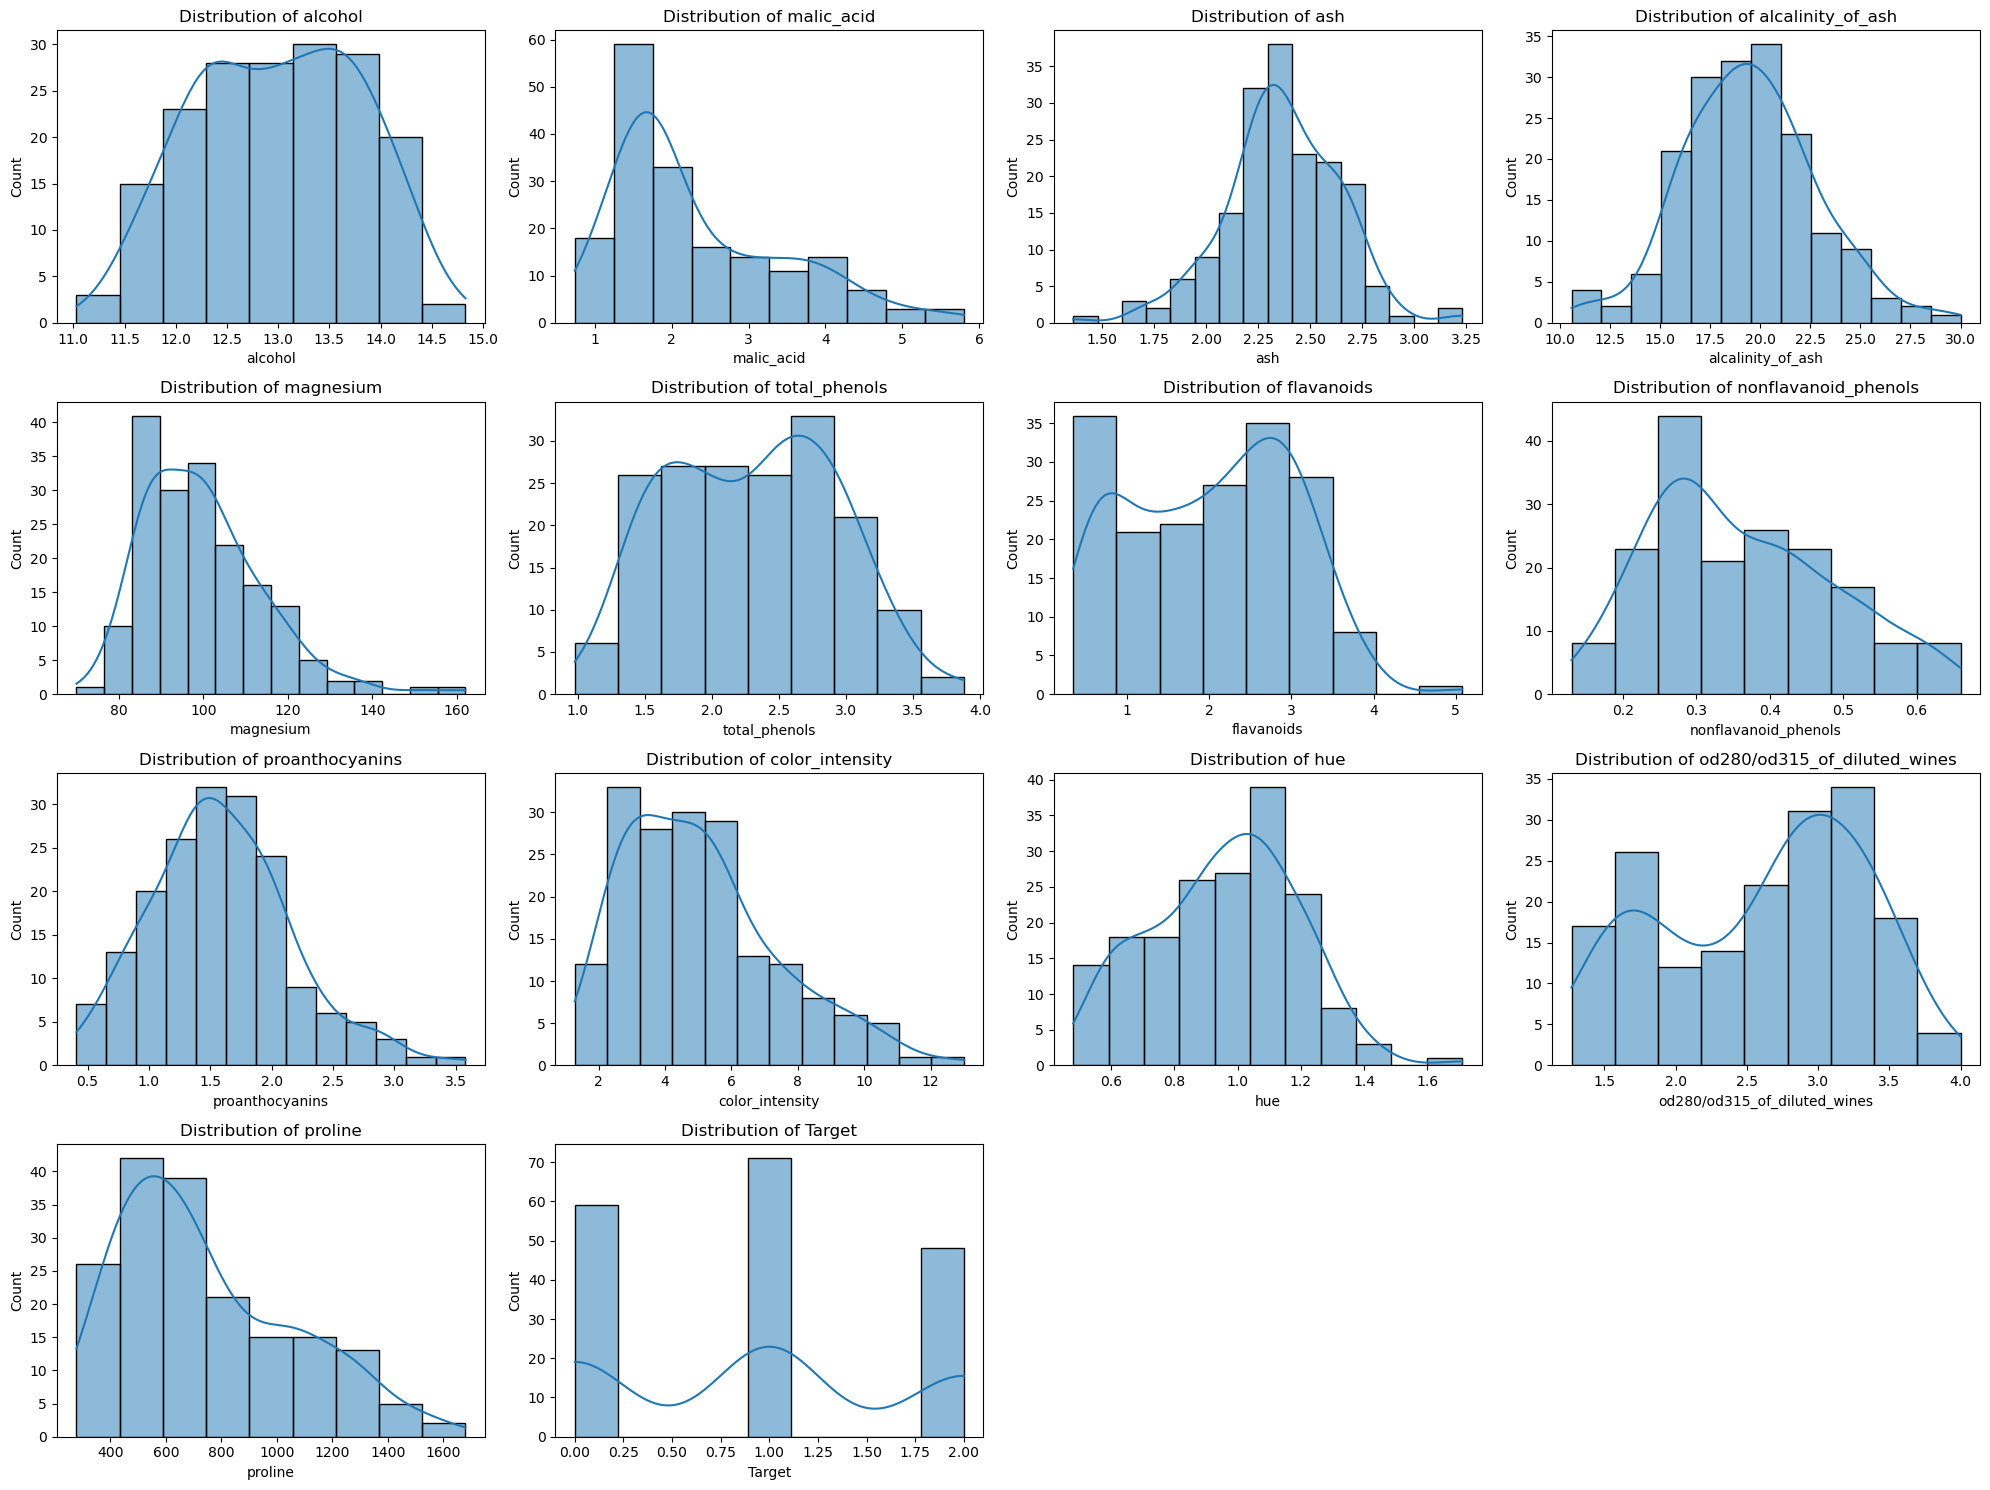

In [16]:
plt.rcParams['figure.figsize'] = (20, 15)
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

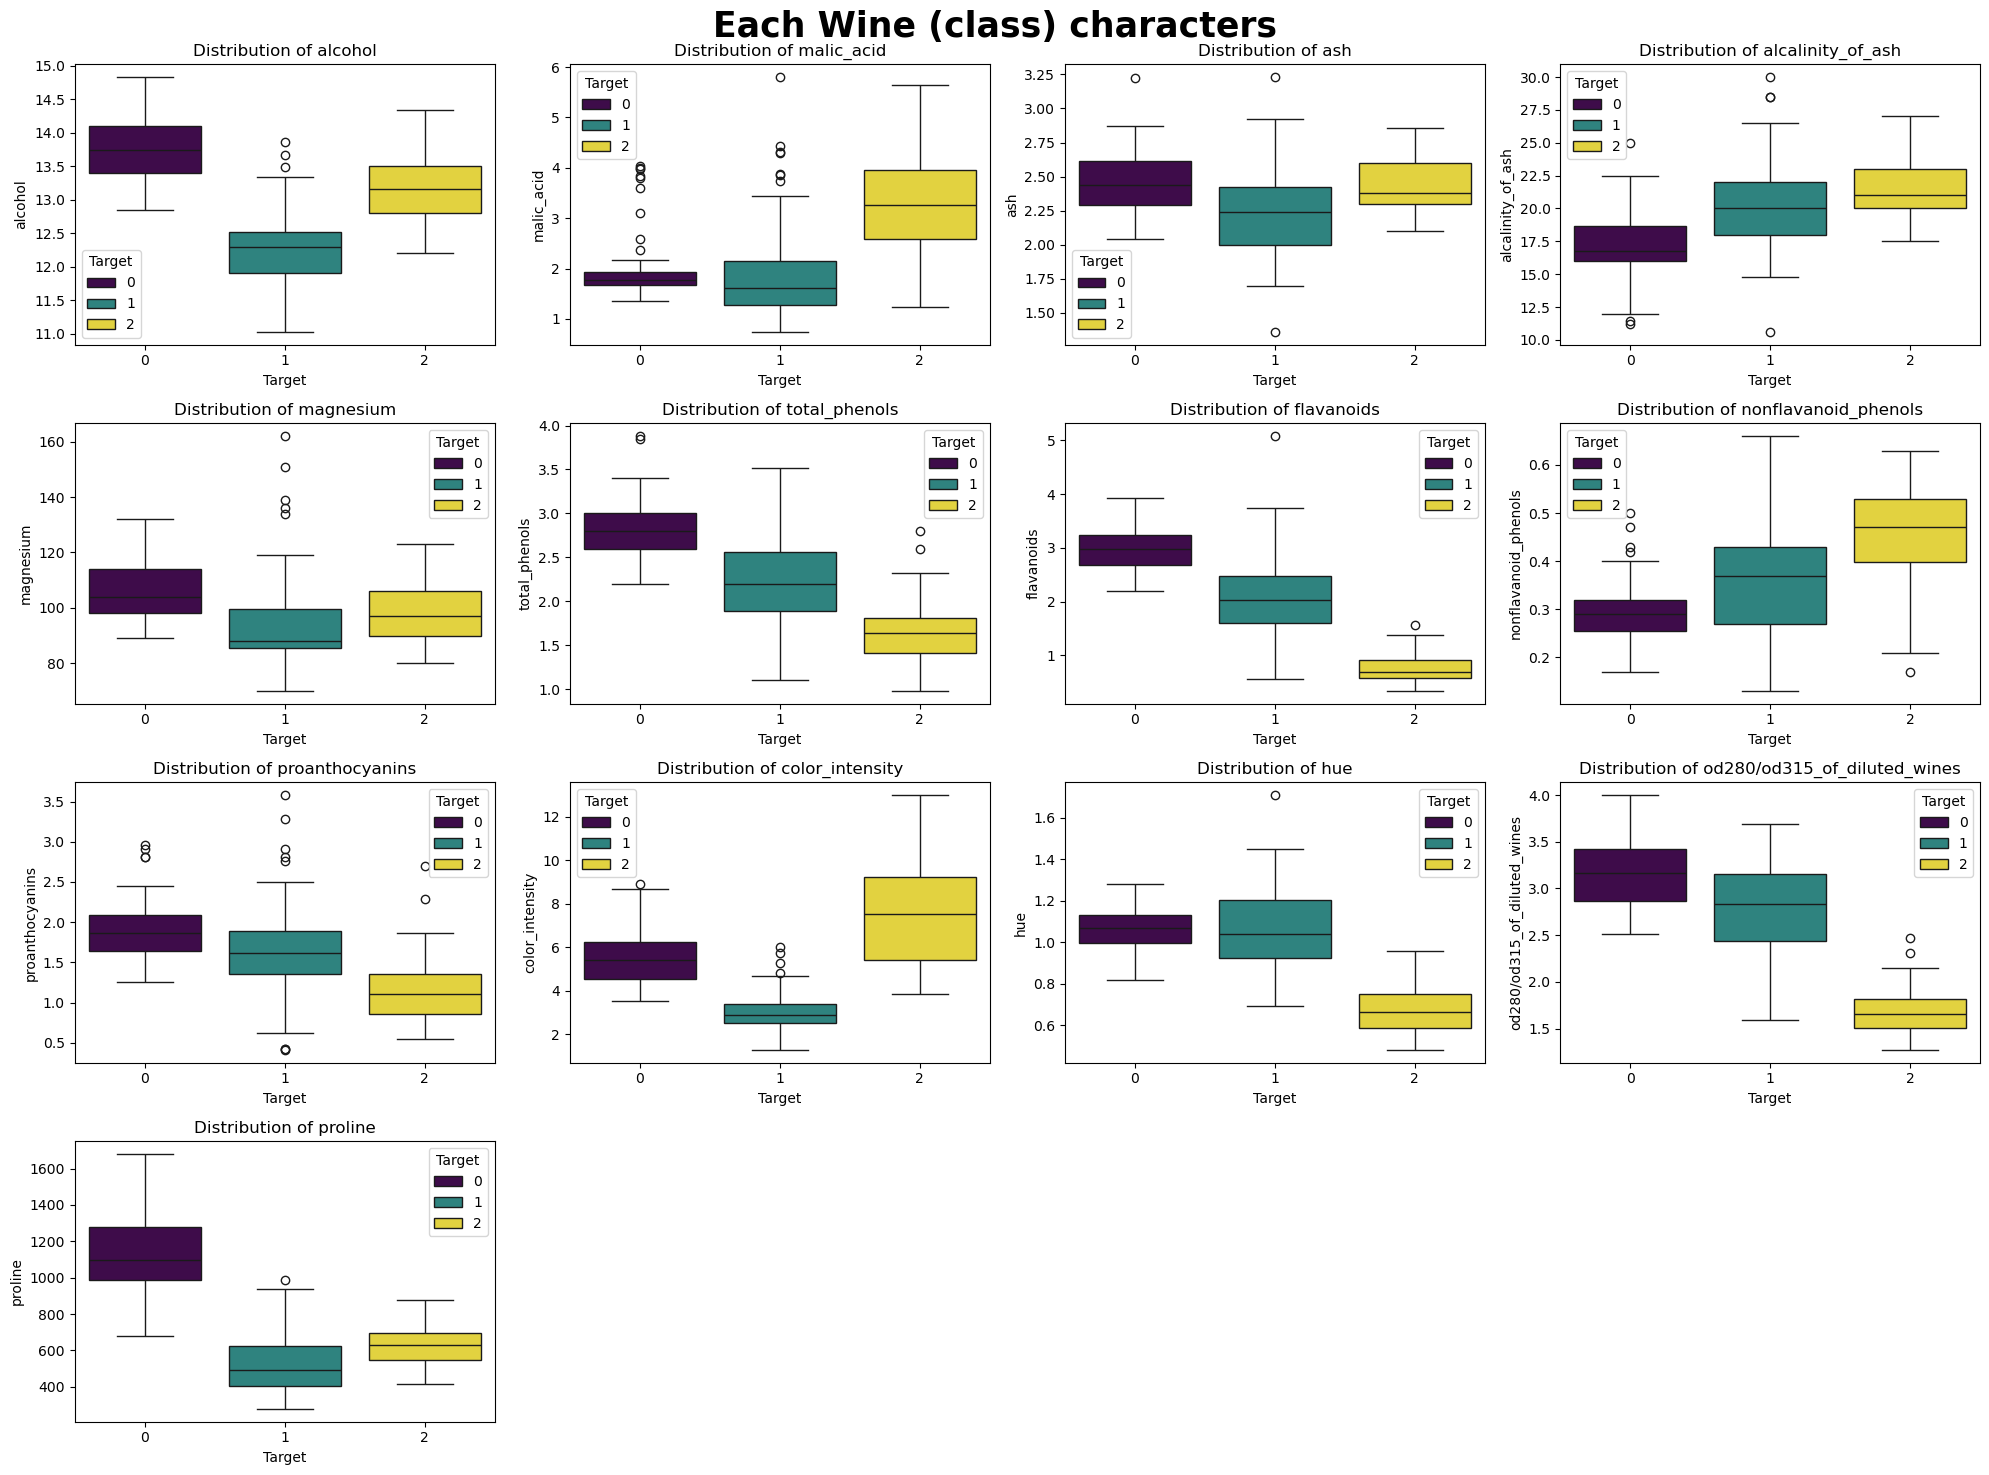

In [18]:
for i, col in enumerate(df.drop('Target', axis=1).columns):
    plt.subplot(4, 4, i+1)
    plt.title(f'Distribution of {col}')
    sns.boxplot(data=df, x='Target', y=col, hue='Target', palette='viridis')
plt.suptitle(f'Each Wine (class) characters', size=25, weight='bold')
plt.tight_layout()
plt.show()

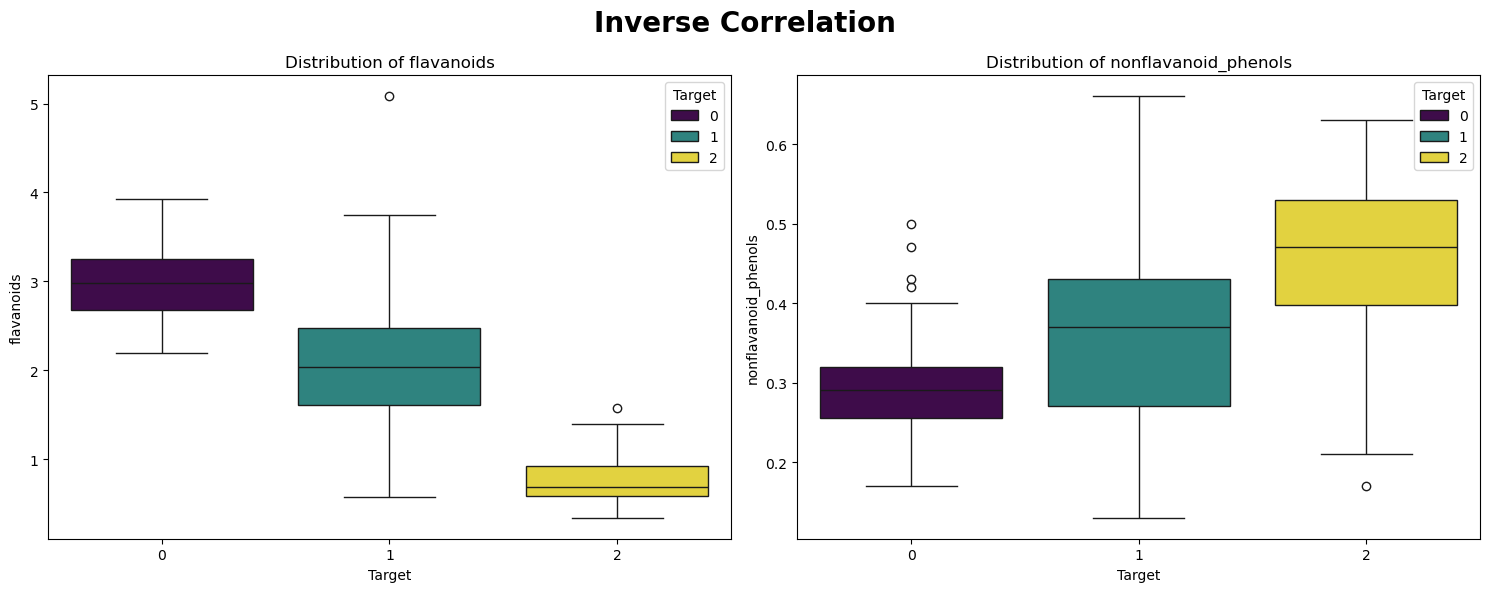

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of flavanoids')
sns.boxplot(data=df, x='Target', y='flavanoids', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of nonflavanoid_phenols')
sns.boxplot(data=df, x='Target', y='nonflavanoid_phenols', hue='Target', palette='viridis')

plt.suptitle('Inverse Correlation', size=20, weight='bold')
plt.tight_layout()
plt.show()

- `flavanoids` tell the color and taste, `nonflavanoid` is more of the stability.
- meaning it the flavor is `decreseing` the wine is `more stable` (in case of the contents)

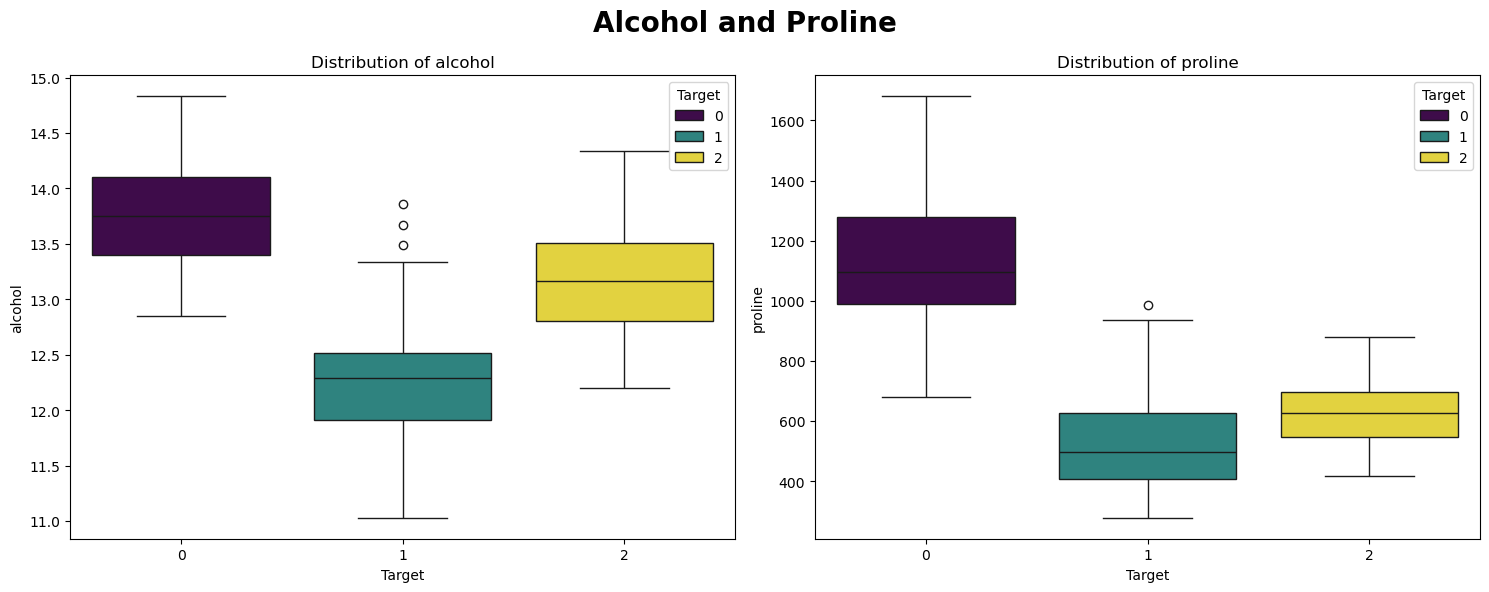

In [24]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of alcohol')
sns.boxplot(data=df, x='Target', y='alcohol', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of proline')
sns.boxplot(data=df, x='Target', y='proline', hue='Target', palette='viridis')

plt.suptitle('Alcohol and Proline', size=20, weight='bold')
plt.tight_layout()
plt.show()

- `wine 0` has the highest **alcohol** as well as **aroma (proline)**
- there's a slight tendency where the alcohol is high the proline is also high

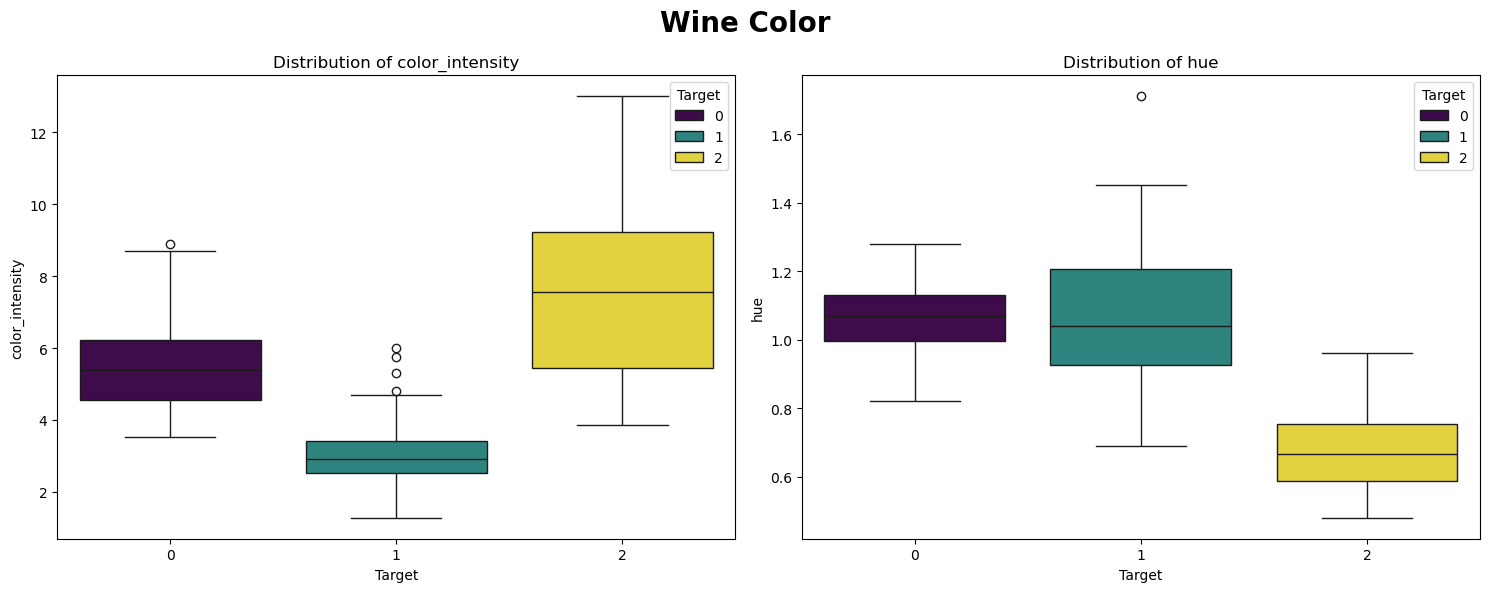

In [26]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of color_intensity')
sns.boxplot(data=df, x='Target', y='color_intensity', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of hue')
sns.boxplot(data=df, x='Target', y='hue', hue='Target', palette='viridis')

plt.suptitle('Wine Color', size=20, weight='bold')
plt.tight_layout()
plt.show()

- `wine 2` has the highest range of `color intensity`, meaning this type of wine is `richer`
- hue tells age and varietal characteristics, in case of **ash** and **alkalinity_ash** `wine 2` is the highest
- there is a chance `lower` hue means more **chars** and **age**

In [32]:
df['alcohol / magnesium'] = df['alcohol'] / df['magnesium']
df['malic_acid / flavanoids'] = df['malic_acid'] / df['flavanoids']

In [33]:
df.groupby('Target')['alcohol / magnesium'].mean()

Target
0    0.130398
1    0.133073
2    0.134010
Name: alcohol / magnesium, dtype: float64

In [34]:
df.groupby('Target')['malic_acid / flavanoids'].mean()

Target
0    0.691289
1    1.011337
2    4.947384
Name: malic_acid / flavanoids, dtype: float64

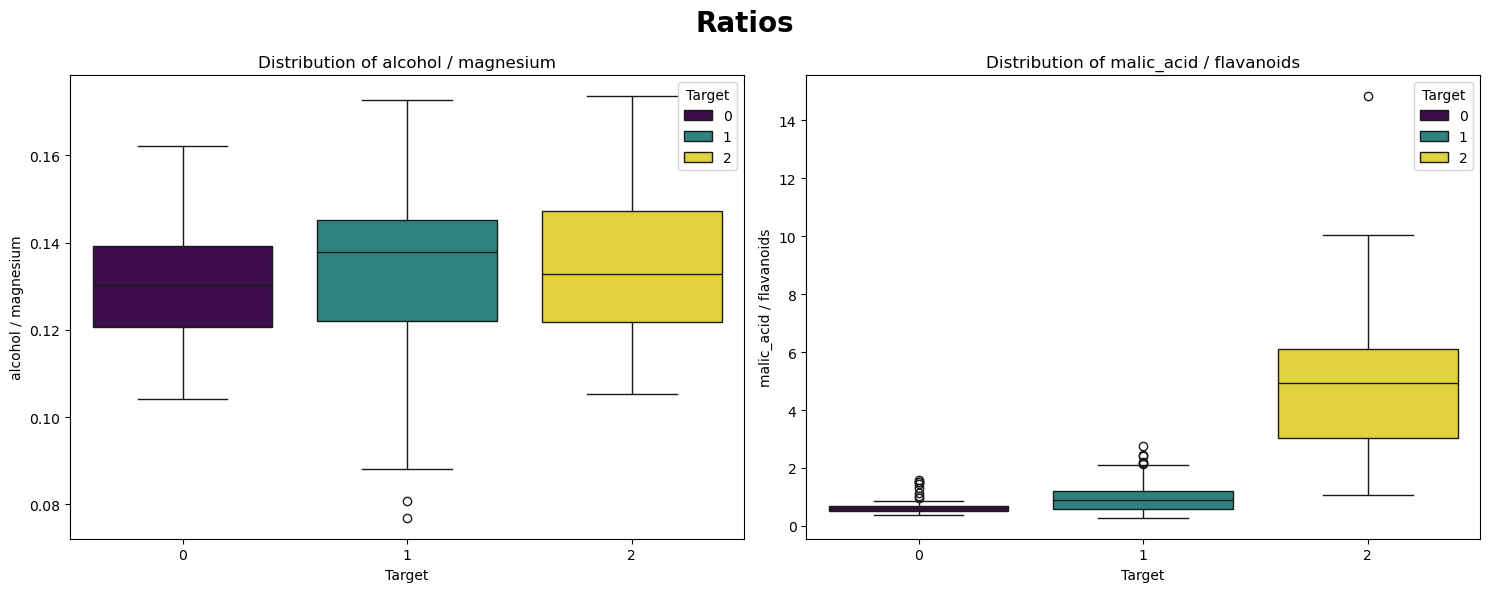

In [35]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title(f'Distribution of alcohol / magnesium')
sns.boxplot(data=df, x='Target', y='alcohol / magnesium', hue='Target', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Distribution of malic_acid / flavanoids')
sns.boxplot(data=df, x='Target', y='malic_acid / flavanoids', hue='Target', palette='viridis')

plt.suptitle('Ratios', size=20, weight='bold')
plt.tight_layout()
plt.show()

- in case of the `alcohol intensity` and `magnesium` (**yeast healthiness**) good ratio, `wine 2 wins`
- `wine 0` has consistent ratio of `malic_acid` and `flavanoids` (almost reaching 1:1)
-` wine 2` is diverse in tem of the ratio, it is `higher` in term of the **malic_acid** and lower in term of **flavanoids**

In [36]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Target',
       'alcohol / magnesium', 'malic_acid / flavanoids'],
      dtype='object')

In [44]:
total = np.sum(df[['flavanoids', 'nonflavanoid_phenols', 'proanthocyanins']], axis=1)
total

0      5.63
1      4.30
2      6.35
3      5.91
4      4.90
       ... 
173    2.19
174    2.59
175    2.47
176    2.67
177    2.67
Length: 178, dtype: float64

In [49]:
ratio = df[['flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'Target']]

In [50]:
ratio.iloc[:, :-1] = ratio.iloc[:, :-1].divide(total, axis=0)

In [51]:
ratio

,flavanoids,nonflavanoid_phenols,proanthocyanins,Target
0,0.543517,0.049734,0.406750,0
1,0.641860,0.060465,0.297674,0
2,0.510236,0.047244,0.442520,0
3,0.590525,0.040609,0.368866,0
4,0.548980,0.079592,0.371429,0
...,...,...,...,...
173,0.278539,0.237443,0.484018,2
174,0.289575,0.166023,0.544402,2
175,0.279352,0.174089,0.546559,2
176,0.254682,0.198502,0.546816,2


In [52]:
ratio.groupby('Target').mean()

,flavanoids,nonflavanoid_phenols,proanthocyanins
Target,,,
0,0.578127,0.057185,0.364687
1,0.507179,0.098656,0.394165
2,0.326438,0.198034,0.475528


- the ratio tells us that `wine 0` has the **lowest** avg of nonflavanoid, meaning it is **more not stable**
- `wine 2` tells us it has the **most evenly distributed phenols** out of all

In [53]:
df.var()

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
Target                              0.600679
alcohol / magnesium                 0.000277
malic_acid / flavanoids             5.336853
dtype: float64

`proline` and `magnesium` has the highest variance out of all, meaning there's a chance of disperate/differentiate the classes

In [54]:
def compute_MI(table_contingency):
    observed = np.array(table_contingency.iloc[:-1, :-1])
    ratios = observed / np.sum(observed)
    Px = np.sum(ratios, axis=1, keepdims=True)
    Py = np.sum(ratios, axis=0, keepdims=True)
    nonzero = ratios > 0
    MI = np.sum( ratios[nonzero] * np.log( ratios[nonzero] / (Px @ Py)[nonzero] ) )
    return MI

In [56]:
bins = int(np.log(len(df) + 1))
print(f'Total groups for the numeric features: {bins}')

Total groups for the numeric features: 5


In [58]:
cols = []
MIs = []
for col in df.drop('Target', axis=1).columns:
    X = df[col]
    X = np.digitize(X, bins=np.linspace(X.min(), X.max(), bins))
    X_df = pd.DataFrame(X.T)
    crosstab = pd.crosstab(X_df[0], df['Target'])
    MI = compute_MI(crosstab)
    MIs.append(MI)
    cols.append(col)
    print(f'{col} MI: {MI}')

alcohol MI: 0.476503769800242
malic_acid MI: 0.006855474864048256
ash MI: 0.0773654397703771
alcalinity_of_ash MI: 0.11340823569615263
magnesium MI: 0.20435324598159949
total_phenols MI: 0.1684425968368935
flavanoids MI: 0.1982539475282251
nonflavanoid_phenols MI: 0.07618788944471505
proanthocyanins MI: 0.07612959350309711
color_intensity MI: 0.3117814540907777
hue MI: 0.03476701291623262
od280/od315_of_diluted_wines MI: 0.11523221964496025
proline MI: 0.49132949513303786
alcohol / magnesium MI: 0.05316611936858931
malic_acid / flavanoids MI: 0.0


In [72]:
indices = np.argsort(MIs)[::-1]
print(list(np.array(cols)[indices]))

['proline', 'alcohol', 'color_intensity', 'magnesium', 'flavanoids', 'total_phenols', 'od280/od315_of_diluted_wines', 'alcalinity_of_ash', 'ash', 'nonflavanoid_phenols', 'proanthocyanins', 'alcohol / magnesium', 'hue', 'malic_acid', 'malic_acid / flavanoids']


In [74]:
print(np.array(MIs)[indices])

[0.4913295  0.47650377 0.31178145 0.20435325 0.19825395 0.1684426
 0.11523222 0.11340824 0.07736544 0.07618789 0.07612959 0.05316612
 0.03476701 0.00685547 0.        ]


`proline` and `alcohol` has the highest MI score, meaning they **contribute the most** in predicting the **target**, although this value is `quite small` to be considered significant

In [76]:
def accuracy_calc(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

def cross_validation(X, y, model, k=3):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    fold_size = n_samples // k
    accuracies = []
    
    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k - 1 else n_samples 
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])
        
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_calc(y_pred, y_test)
        accuracies.append(accuracy)
        
    data = {
        'y_pred': y_pred, 'accuracies': accuracies,
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
    }
    
    return data 

In [77]:
def standardScalar(data):
    return (data - data.mean()) / data.std()

df_sclaed = df.copy()
for col in df.drop('Target', axis=1).columns:
    df_sclaed[col] = standardScalar(df_sclaed[col])


In [79]:
df_sclaed.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,alcohol / magnesium,malic_acid / flavanoids
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0,-1.226261,-0.609410
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0,-0.026399,-0.572138
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0,-0.128807,-0.536007
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0,-0.316963,-0.609446
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0,-1.216872,-0.434530
